__лабораторная работа N1:__  базовые методы машинного обучения, метрический подход

__часть 2__: решение задачи кластеризации

__цель:__ изучить возможности "классических" методов машинного обучения    
      на примере инструментов библиотеки scikit-learn

__порядок выполнения:__ для каждого типа задачи
1. получить/сгенерировать данные 
2. изучить/визуализировать данные
3. применить к ним соответствующий задаче метод,   
4. к результатам модели применить методы оценки  

In [2]:
import numpy as np

## данные

In [5]:
from sklearn import datasets
#help(datasets)

In [80]:
# выбираем один из вариантов
#from sklearn.datasets import make_blobs # модельные данные 

# https://archive.ics.uci.edu
# https://www.openml.org/search?type=data
from sklearn.datasets import fetch_openml
from pandas import DataFrame
btsc = fetch_openml('blood-transfusion-service-center')
btsc_data = btsc["data"]

print(btsc_data)

       V1    V2       V3    V4
0     2.0  50.0  12500.0  98.0
1     0.0  13.0   3250.0  28.0
2     1.0  16.0   4000.0  35.0
3     2.0  20.0   5000.0  45.0
4     1.0  24.0   6000.0  77.0
..    ...   ...      ...   ...
743  23.0   2.0    500.0  38.0
744  21.0   2.0    500.0  52.0
745  23.0   3.0    750.0  62.0
746  39.0   1.0    250.0  39.0
747  72.0   1.0    250.0  72.0

[748 rows x 4 columns]


In [25]:
# изучение/визуализация данных
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
# Смотрим на названия переменных
print (btsc.feature_names)
# Смотрим на данные, выводим 10 первых строк: 
print(btsc.data[:10] )
# Смотрим на целевую переменную:
print (btsc.target_names)
print (btsc.target)

btsc_frame = DataFrame(btsc.data)
# Добавляем столбец с целевой переменной: 
btsc_frame['target'] = btsc.target
btsc_frame


['V1', 'V2', 'V3', 'V4']
    V1    V2       V3    V4 target
0  2.0  50.0  12500.0  98.0      2
1  0.0  13.0   3250.0  28.0      2
2  1.0  16.0   4000.0  35.0      2
3  2.0  20.0   5000.0  45.0      2
4  1.0  24.0   6000.0  77.0      1
5  4.0   4.0   1000.0   4.0      1
6  2.0   7.0   1750.0  14.0      2
7  1.0  12.0   3000.0  35.0      1
8  2.0   9.0   2250.0  22.0      2
9  5.0  46.0  11500.0  98.0      2
['Class']
0      2
1      2
2      2
3      2
4      1
      ..
743    1
744    1
745    1
746    1
747    1
Name: Class, Length: 748, dtype: category
Categories (2, object): ['1', '2']


,V1,V2,V3,V4,target
0,2.0,50.0,12500.0,98.0,2
1,0.0,13.0,3250.0,28.0,2
2,1.0,16.0,4000.0,35.0,2
3,2.0,20.0,5000.0,45.0,2
4,1.0,24.0,6000.0,77.0,1
...,...,...,...,...,...
743,23.0,2.0,500.0,38.0,1
744,21.0,2.0,500.0,52.0,1
745,23.0,3.0,750.0,62.0,1
746,39.0,1.0,250.0,39.0,1


## загружаем и применяем модель кластеризатора

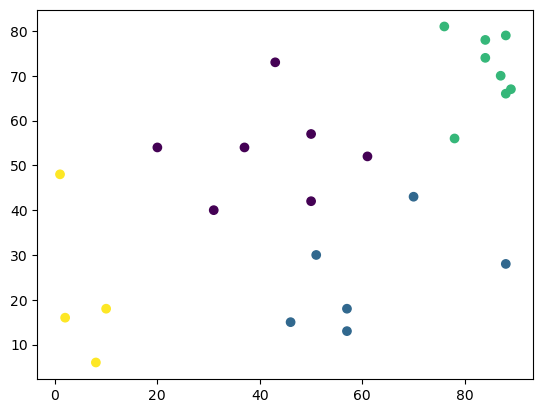

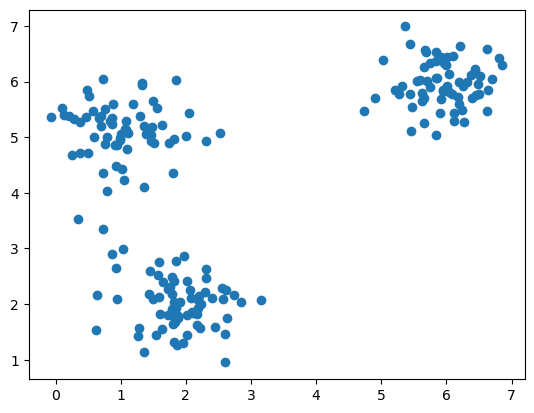

[[5.93749466 5.95944663 5.08229754]
 [1.89394804 2.0075978  2.05014129]
 [1.03901763 5.13944956 5.00006395]]
Estimated clusters: 3


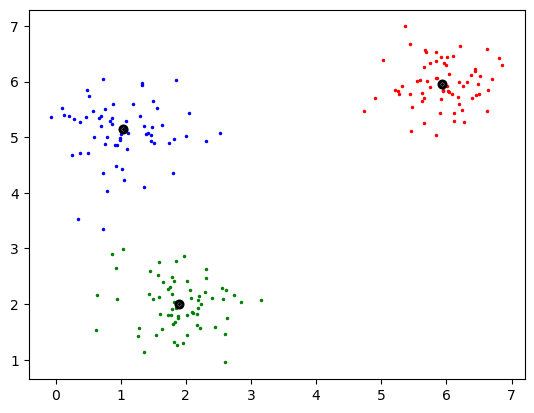

DBSCAN(eps=3, min_samples=2)

In [125]:
from sklearn.cluster import KMeans
# generate random dataframe
df = DataFrame({'x': np.random.randint(1, 100, 25), 'y': np.random.randint(1, 100, 25)}, columns=['x', 'y'])
# cluster
clustered = model.fit_predict(df)
# plot results
plt.scatter(df['x'], df['y'], c=clustered)
plt.show()

from sklearn.cluster import MeanShift
from sklearn.datasets import make_blobs
position = [[6,6,5],[2,2,2],[1,5,5]]
X,_=make_blobs(n_samples=200,centers=position,cluster_std=0.5)
plt.scatter(X[:,0],X[:,1])
plt.show()

ms = MeanShift()
ms.fit(X)
labels = ms.labels_
cluster_centers = ms.cluster_centers_
print(cluster_centers)
n_clusters_ = len(np.unique(labels))

print("Estimated clusters:", n_clusters_)

for i in range(len(X)):
    plt.plot(X[i][0], X[i][1], colors[labels[i]], markersize = 3)
plt.scatter(cluster_centers[:,0],cluster_centers[:,1],
           marker=".",color='k', s=20, linewidths = 5, zorder=10)
plt.show()

from sklearn.cluster import DBSCAN
X = np.array([[1, 2], [2, 2], [2, 3], [8, 7], [8, 8], [25, 80]])
clustering = DBSCAN(eps=3, min_samples=2).fit(X)
clustering.labels_
clustering


## оценка кластеризации

In [126]:
from sklearn.metrics import silhouette_score # считаем метрику качества
# отношение внутрикластерного и межкластерного расстояний
silhouette_score(x,y)

0.07779860543221871